# Choosing model

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

car_X=car_num.iloc[:,:-1]
for col in car_X:
    Stdscaler=StandardScaler()
    car_X[col]=Stdscaler.fit_transform(car_X[[col]])

array=car_X.values
X=array[:,:]
array=Cars_df.values
Y=array[:,-1]

models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

for model in models:
    cv_score=cross_val_score(model,X,Y,cv=4)
    print(model,"- \nAccuracy: ",cv_score,'\nMean -',cv_score.mean())

# Decision tree

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
Cars_data=pd.read_excel(r"C:\Users\Madan\Downloads\Cars.xlsx")
Cars_df=pd.DataFrame(Cars_data)

In [6]:
Cars_df

,symboling,drive-wheels,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,2,64.1,48.8,7,130,111,21,27,13495,...,0,0,0,0,1,1,0,0,0,0
1,3,2,64.1,48.8,7,130,111,21,27,16500,...,0,0,0,0,1,1,0,0,0,0
2,1,2,65.5,52.4,6,152,154,19,26,16500,...,0,0,0,0,1,0,0,1,0,0
3,2,3,66.2,54.3,5,109,102,24,30,13950,...,0,0,0,0,1,0,0,0,1,0
4,2,1,66.4,54.3,5,136,115,18,22,17450,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-1,2,68.9,55.5,5,141,114,23,28,16845,...,0,0,1,0,1,0,0,0,1,0
199,-1,2,68.8,55.5,5,141,160,19,25,19045,...,0,0,1,0,1,0,0,0,1,0
200,-1,2,68.9,55.5,6,173,134,18,23,21485,...,0,0,1,0,1,0,0,0,1,0
201,-1,2,68.9,55.5,5,145,106,26,27,22470,...,0,0,1,1,0,0,0,0,1,0


In [18]:
Cars_df.shape

(203, 13)

In [7]:
X=Cars_df.drop(columns='price')
Y=Cars_df.loc[:,['price']]

In [8]:
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

[Text(0.6860152714932126, 0.9666666666666667, 'engine-size <= 182.0\nsquared_error = 62069584.098\nsamples = 136\nvalue = 12985.074'),
 Text(0.42180429864253394, 0.9, 'highway-mpg <= 28.5\nsquared_error = 22224038.139\nsamples = 126\nvalue = 11227.5'),
 Text(0.13065610859728508, 0.8333333333333334, 'horsepower <= 114.5\nsquared_error = 11949800.386\nsamples = 37\nvalue = 16472.784'),
 Text(0.06334841628959276, 0.7666666666666667, 'horsepower <= 96.0\nsquared_error = 3925178.536\nsamples = 14\nvalue = 14283.5'),
 Text(0.04524886877828054, 0.7, 'city-mpg <= 22.0\nsquared_error = 36100.0\nsamples = 2\nvalue = 16885.0'),
 Text(0.03619909502262444, 0.6333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 16695.0'),
 Text(0.05429864253393665, 0.6333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 17075.0'),
 Text(0.08144796380090498, 0.7, 'width <= 68.65\nsquared_error = 3257396.743\nsamples = 12\nvalue = 13849.917'),
 Text(0.07239819004524888, 0.6333333333333333, 'body-style_w

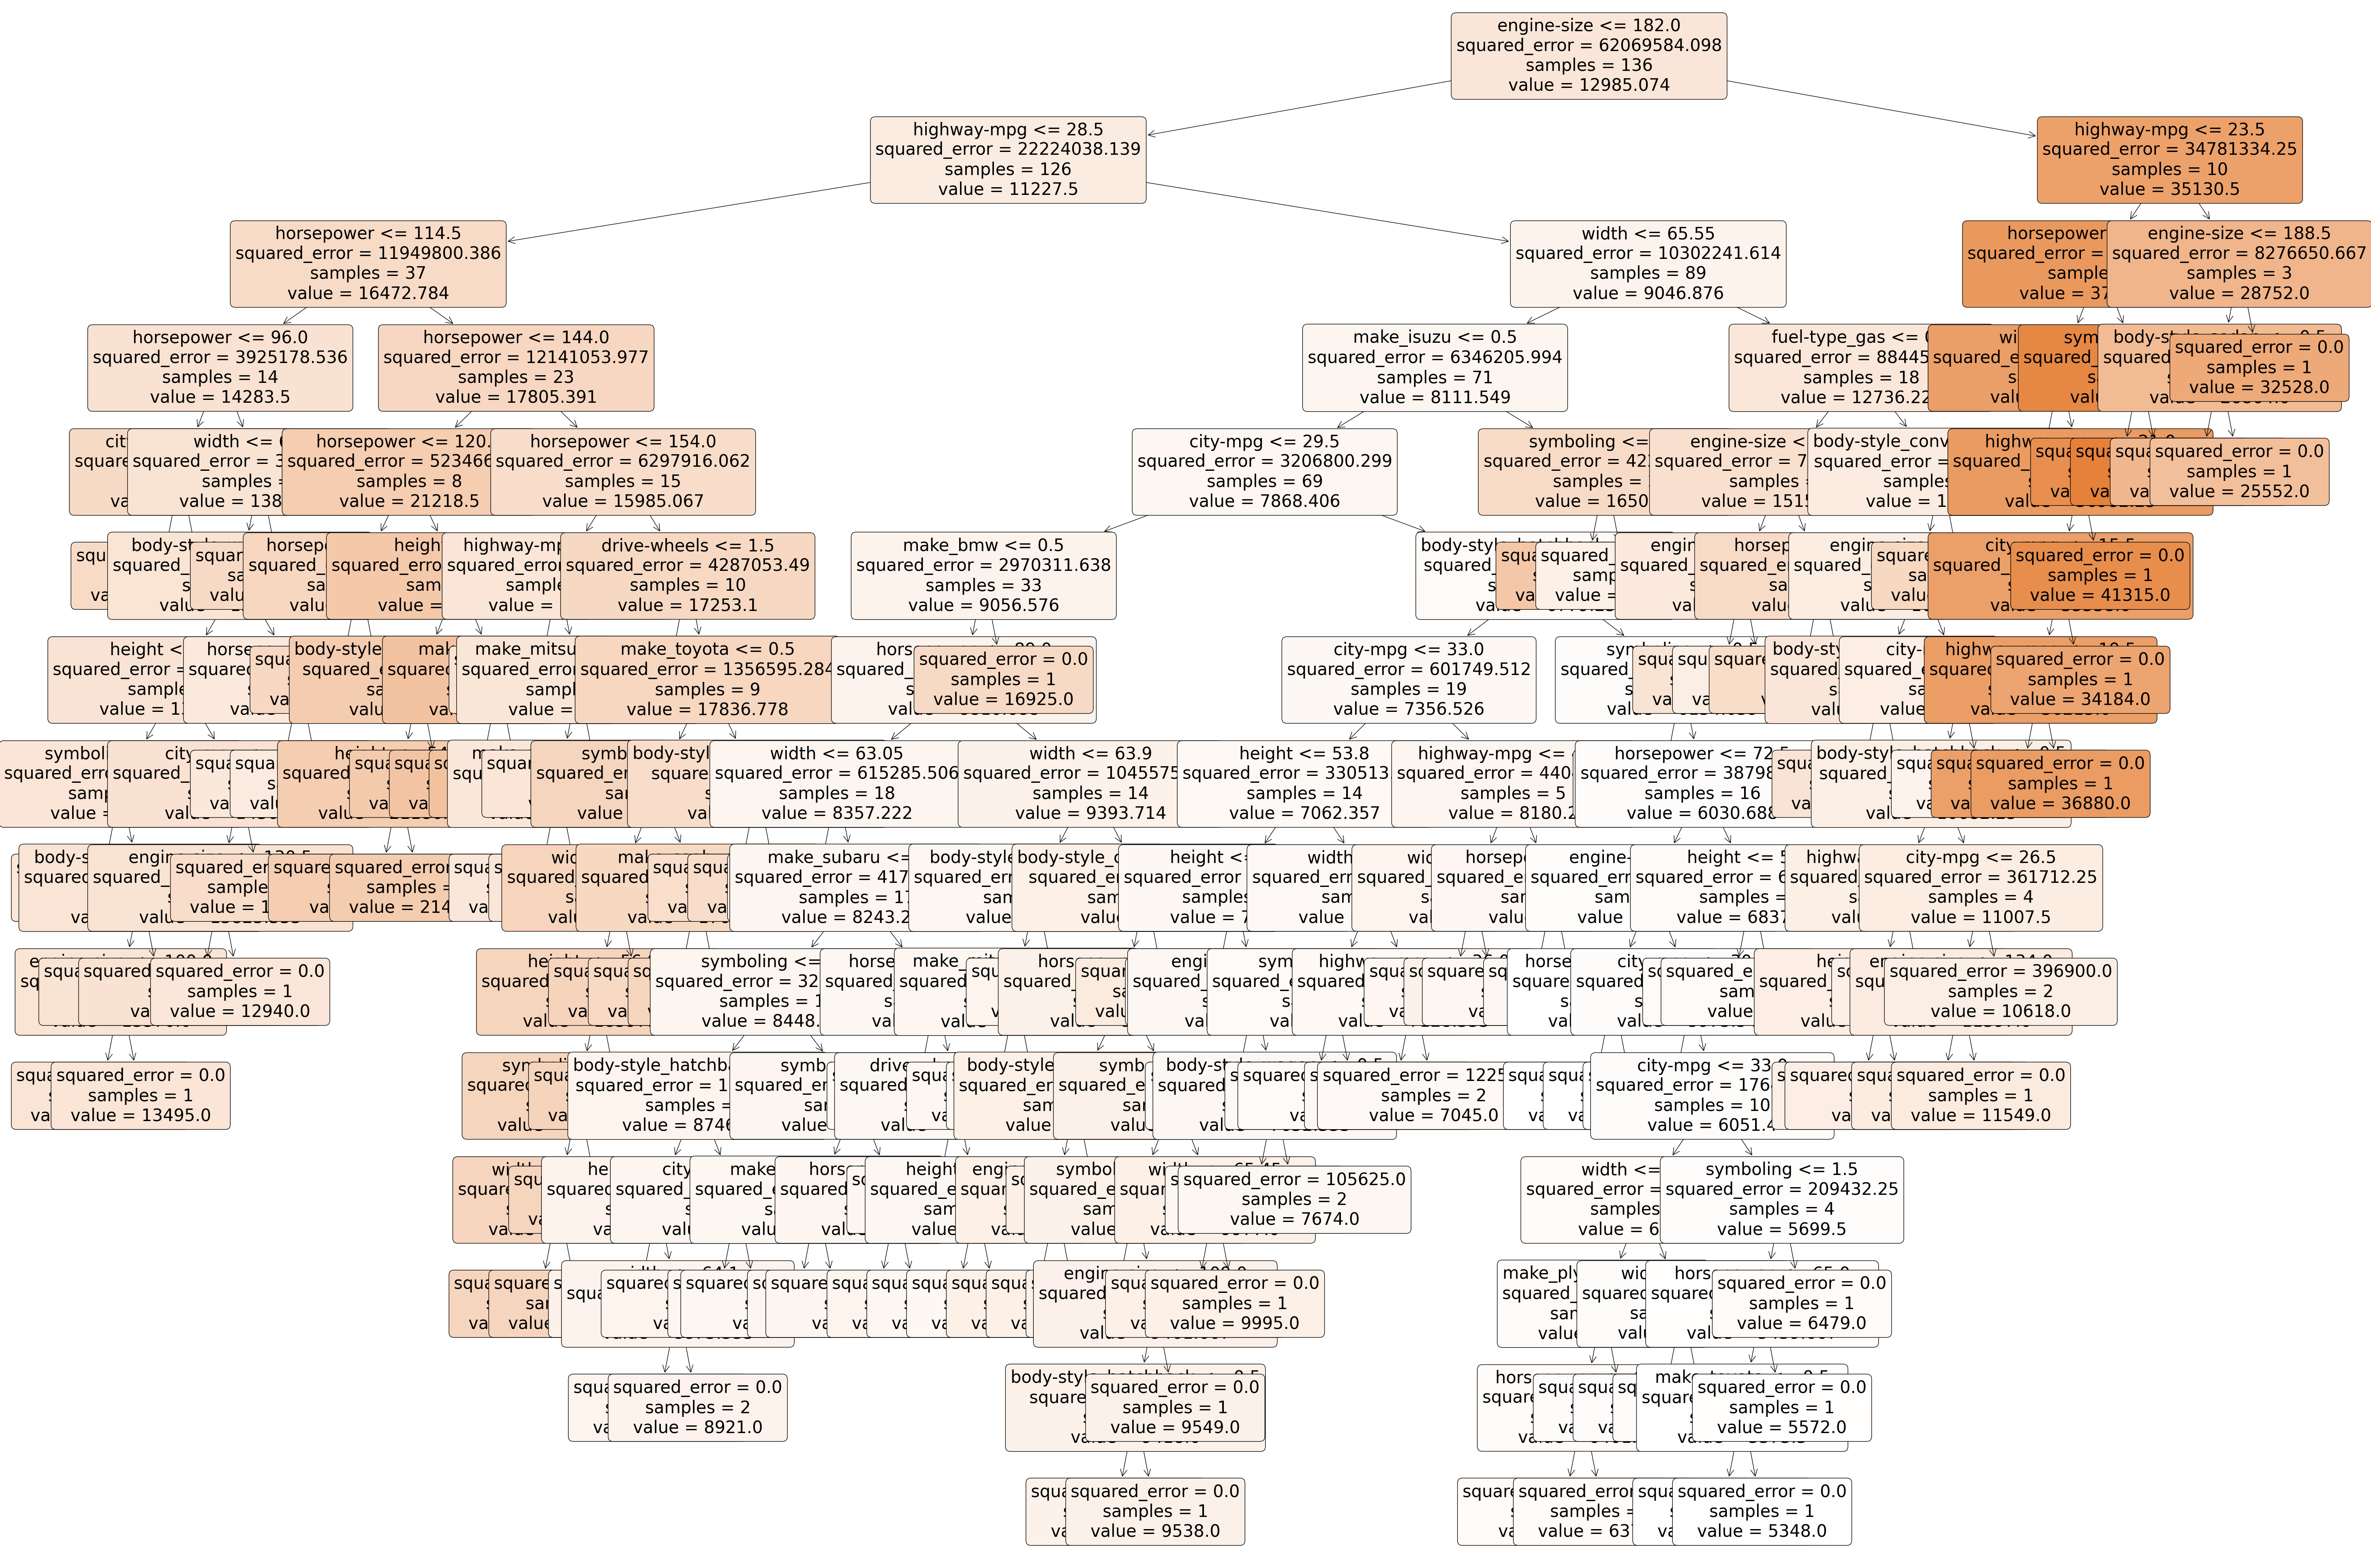

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=10)

tree_model=DecisionTreeRegressor()
tree_model=tree_model.fit(X_train,Y_train)
y_pred=tree_model.predict(X_test)

plt.figure(figsize=(70,50))
plot_tree(tree_model,filled=True,rounded=True,'Yes BC'],feature_names=X.columns,fontsize=30)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

score=tree_model.score(X_train,Y_train)
print(score)
score=tree_model.score(X_test,Y_test)
print(score)

Mean Absolute Error (MAE): 2291.910447761194
Mean Squared Error (MSE): 16554492.776119404
Root Mean Squared Error (RMSE): 4068.7212703894334
R-squared (R2): 0.7384080974043166
0.9955494530722222
0.7384080974043166


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
l=[]
for i in range(1,15):
    tree_model=DecisionTreeRegressor(max_depth=i)
    tree_model.fit(X_train,Y_train)
    y_pred=tree_model.predict(X_test)
    l.append(mean_squared_error(Y_test,y_pred))
print(l.index(min(l)))
print(min(l))

2
12316445.757542357


Mean Absolute Error (MAE): 2647.2478423897173
Mean Squared Error (MSE): 18746255.286016636
Root Mean Squared Error (RMSE): 4329.6945950051295
R-squared (R2): 0.7037741564702286
0.8184568277577666
0.7037741564702286


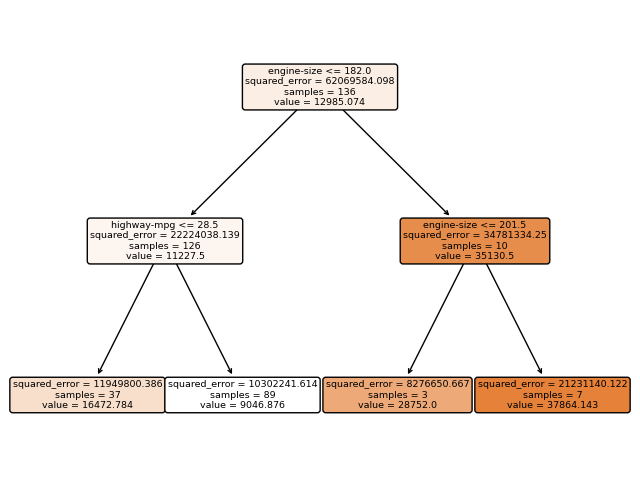

In [16]:
tree_model=DecisionTreeRegressor(max_depth=2)
tree_model=tree_model.fit(X_train,Y_train)
y_pred=tree_model.predict(X_test)
plt.figure(figsize=(8,6))
plot_tree(tree_model,filled=True,rounded=True,class_names=['Profit','No Profit'],feature_names=X.columns)

mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

score=tree_model.score(X_train,Y_train)
print(score)
score=tree_model.score(X_test,Y_test)
print(score)